# Energie et environment en Belgique

Le dataset est tiré d'un site web gouvernemental:: http://ibsa.brussels/themes/environnement-et-energie?set_language=fr#.XHfBHuhKhXw 

Les données rassemblées ici portent sur le climat, la qualité de l’air, la consommation et la qualité de l’eau, les collectes de déchets, les espaces verts, la biodiversité, la consommation énergétique, etc.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 

import matplotlib.pyplot as plt
FIGSIZE = (12.0, 5.0)
plt.rcParams['figure.figsize'] = (12.0, 5.0)

pd.options.display.max_rows = 55
pd.options.display.max_colwidth = 500

In [2]:
link1 = '12.1_environnement_energie_environnement_territoire_20180220.xlsx'
link2 = '12.2_environnement_energie_environnement_societe_20180829.xlsx'
link3 = '12.3_environnement_energie_energie_20180829.xlsx'

## Qualité de l'air en Bruxelles-Capitale 2005-2017

- Unités : microgrammes par mètre cube, heures\nÉchelle géographique : station de mesure\nSource : Bruxelles Environnement
- : = Non disponible (mesures non effectuées ou non fiables)
- x : Non existant (nouvelle station de mesure en 2013)
- c : Confidentiel (non communiqué)
- a1 : Valeur limite de 40 µg/m3 en tant que concentration moyenne annuelle à ne pas dépasser (à partir de 2010)
- a2 : Valeur limite de 200 µg/m3 en tant que valeur horaire, à ne pas dépasser plus de 18 fois par an (à partir de 2010)

#### Dataframes

- 1 concentrations en dioxyde d'azote (NO2)
- 2 concentrations en ozone (O3) 
- 3 concentrations en particules en suspension de diamètre inférieur à 10 µm 
- 4 concentrations en particules en suspension de diamètre inférieur à 2,5 µm 

In [12]:
xl = pd.ExcelFile(link1)
#print(xl.sheet_names)

df1 = xl.parse(sheet_name= '12.1.1.2', header=1) #NO2
df2 = xl.parse(sheet_name= '12.1.1.3', header=1) #O3
df3 = xl.parse(sheet_name= '12.1.1.4', header=1) #particles <10µm 
df4 = xl.parse(sheet_name= '12.1.1.5', header=1) #particles <2,5µm 

In [13]:
df1.head()

,Année,Molenbeek (R001),Ixelles (R002),Ste-Catherine (B004),Eastman-Belliard (B005),Parlement européen (B006),Belliard Remard (B008),Berchem-Ste-Agathe (B011),Uccle (R012),Haren (N043),Parc Meudon (MEU1),Woluwe St-Lambert (WOL1),Forest (E013)
Concentration moyenne annuelle (µg/m3),2005.0,47.0,58.0,43,40,38,:x,32.0,27.0,46.0,32,44.0,34
Part des jours > 40 µg/m3 (%)a1,2005.0,63.3,81.1,47.4,44.7,40.5,:x,24.1,15.1,61.1,27.9,49.0,29.9
Nombre d'heures > 200 µg/m3 (heures)a2,2005.0,0.0,0.0,1,0,0,:x,0.0,0.0,0.0,0,0.0,0
Concentration moyenne annuelle (µg/m3),2006.0,47.0,54.0,:,39,38,:x,29.0,30.0,45.0,31,46.0,32
Part des jours > 40 µg/m3 (%)a1,2006.0,58.6,77.8,:,41.9,38.1,:x,18.4,17.5,53.7,23.3,56.4,20.3


In [43]:
df1['Belliard Remard (B008)']

0     :x
1     :x
2     :x
3     :x
4     :x
5     :x
6     :x
7     :x
8     :x
9     :x
10    :x
11    :x
12    :x
13    :x
14    :x
15    :x
16    :x
17    :x
18    :x
19    :x
20    :x
21    :x
22    :x
23    :x
24    63
25    84
26     5
27    61
28    83
29     3
30    62
31    78
32     9
33    :c
34    :c
35    :c
36    :c
37    :c
38    :c
Name: Belliard Remard (B008), dtype: object

### Data manipulation

The plot the different concentration measurements vs. year, we will need the concentrations as columns an the locations as rows. 

In [14]:
df1 = df1.reset_index()

In [15]:
df1 = df1.iloc[:39]

In [9]:
#df1.rename(columns={'index':'measure'}, inplace=True)

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 14 columns):
index                        39 non-null object
Année                        39 non-null float64
Molenbeek (R001)             39 non-null float64
Ixelles
(R002)               39 non-null float64
Ste-Catherine (B004)         39 non-null object
Eastman-Belliard (B005)      39 non-null object
Parlement européen (B006)    39 non-null object
Belliard Remard (B008)       39 non-null object
Berchem-Ste-Agathe (B011)    39 non-null float64
Uccle
(R012)                 39 non-null float64
Haren
(N043)                 39 non-null float64
Parc Meudon (MEU1)           39 non-null object
Woluwe 
St-Lambert (WOL1)    39 non-null float64
Forest
(E013)                39 non-null object
dtypes: float64(7), object(7)
memory usage: 4.3+ KB


In [17]:
data = df1.melt(id_vars=['index', 'Année'], 
               value_vars= df1.columns[2:], 
               var_name='location', 
               value_name='concentration').pivot_table(index=['location', 'Année'], 
                                                       columns=['index'], 
                                                       aggfunc=lambda x:x)

data.head()


concentration  \
index                         Concentration moyenne annuelle (µg/m3)   
location               Année                                           
Belliard Remard (B008) 2005.0                                     :x   
                       2006.0                                     :x   
                       2007.0                                     :x   
                       2008.0                                     :x   
                       2009.0                                     :x   

                                                                      \
index                         Nombre d'heures > 200 µg/m3 (heures)a2   
location               Année                                           
Belliard Remard (B008) 2005.0                                     :x   
                       2006.0                                     :x   
                       2007.0                                     :x   
                       2008.0                                     :x   
                       2009.0                                     :x   

                                                               
index                         Part des jours > 40 µg/m3 (%)a1  
location               Année                                   
Belliard Remard (B008) 2005.0                              :x  
                       2006.0                              :x  
                       2007.0                              :x  
                       2008.0                              :x  
                       2009.0                              :x

It is not clear to me why if I do first the melt and then the pivot_table it does not work. In that case the dataframe becomes a nontype object. 

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 5 columns):
location                                  156 non-null object
Année                                     156 non-null float64
Concentration moyenne annuelle (µg/m3)    156 non-null object
Nombre d'heures > 200 µg/m3 (heures)a2    156 non-null object
Part des jours > 40 µg/m3 (%)a1           156 non-null object
dtypes: float64(1), object(4)
memory usage: 6.2+ KB


In [23]:
data.columns = data.columns.droplevel()
data = data.reset_index()
data.head()

AttributeError: 'Index' object has no attribute 'droplevel'

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 5 columns):
location                                  156 non-null object
Année                                     156 non-null float64
Concentration moyenne annuelle (µg/m3)    156 non-null object
Nombre d'heures > 200 µg/m3 (heures)a2    156 non-null object
Part des jours > 40 µg/m3 (%)a1           156 non-null object
dtypes: float64(1), object(4)
memory usage: 6.2+ KB


 ### Cleaning data
 
 We need to remove the values that are NaN and transform the concentration measurements into numeric.

In [26]:
#I preferred to use replace than to_numeric 

#observing the unique names of the missing values
data.columns[data.isna().sum()!=0]

data = data[2:].replace([':', ':c', ':x'], 0)

In [21]:
data.head()

index,location,Année,Concentration moyenne annuelle (µg/m3),Nombre d'heures > 200 µg/m3 (heures)a2,Part des jours > 40 µg/m3 (%)a1
0,Belliard Remard (B008),2005.0,:x,:x,:x
1,Belliard Remard (B008),2006.0,:x,:x,:x
2,Belliard Remard (B008),2007.0,:x,:x,:x
3,Belliard Remard (B008),2008.0,:x,:x,:x
4,Belliard Remard (B008),2009.0,:x,:x,:x


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 2 to 155
Data columns (total 5 columns):
location                                  154 non-null object
Année                                     154 non-null float64
Concentration moyenne annuelle (µg/m3)    154 non-null float64
Nombre d'heures > 200 µg/m3 (heures)a2    154 non-null float64
Part des jours > 40 µg/m3 (%)a1           154 non-null float64
dtypes: float64(4), object(1)
memory usage: 6.1+ KB


## Visualisation

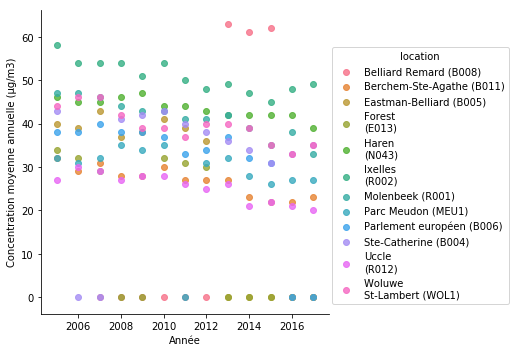

In [29]:
sns.lmplot(data=data, x='Année', y="Concentration moyenne annuelle (µg/m3)", hue='location', fit_reg=False)



## Report

- Belliard Remard presents the highest pollution values, overpassing 60 µg/m3 of NO2. Interestenly, the data from the last two years was labelled as confidential.
- Ixelles is in a second pollution position, with levels between 50- 60 µg/m3 of NO2. 
- Most locations rank between thirty and fifty µg/m3 of NO2.
- Uccle is the cleanest location, with levels between tween and fifty µg/m3 of NO2, and Berchem- Ste. Agathe is the second cleanest.

To better see the trends, let's do a further visualization.

### Trying another method to manipulate the data 

We cut the original dataframe in chuncks, each according to the concentration measurement.

In [37]:
decir = df1[df1['index'] == 'Concentration moyenne annuelle (µg/m3)']

decir.shape

(13, 14)

In [38]:
decir.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 36
Data columns (total 14 columns):
index                        13 non-null object
Année                        13 non-null float64
Molenbeek (R001)             13 non-null float64
Ixelles
(R002)               13 non-null float64
Ste-Catherine (B004)         13 non-null object
Eastman-Belliard (B005)      13 non-null object
Parlement européen (B006)    13 non-null object
Belliard Remard (B008)       13 non-null object
Berchem-Ste-Agathe (B011)    13 non-null float64
Uccle
(R012)                 13 non-null float64
Haren
(N043)                 13 non-null float64
Parc Meudon (MEU1)           13 non-null object
Woluwe 
St-Lambert (WOL1)    13 non-null float64
Forest
(E013)                13 non-null object
dtypes: float64(7), object(7)
memory usage: 1.5+ KB


In [39]:
decir = decir[2:].replace([':', ':c', ':x'], 0)

decir.shape

(11, 14)

It is interesting that we have lost two rows.  Zero values could be inputed to the median.

### Visualizing trends

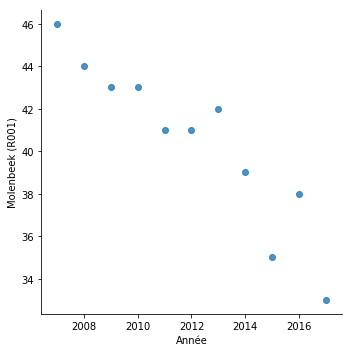

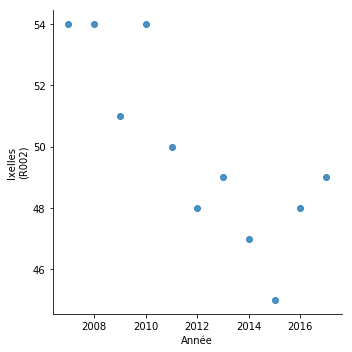

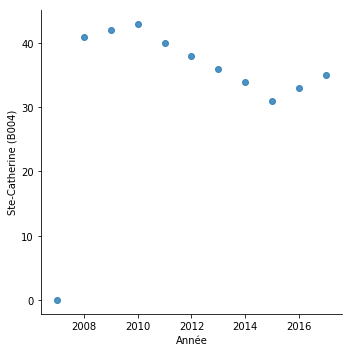

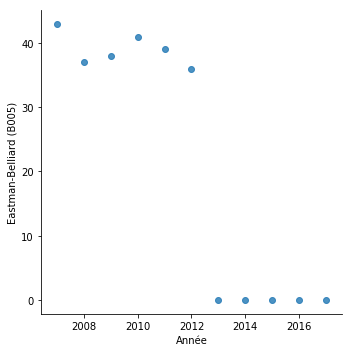

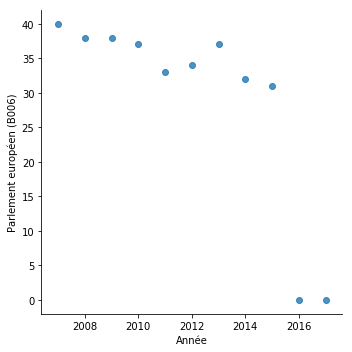

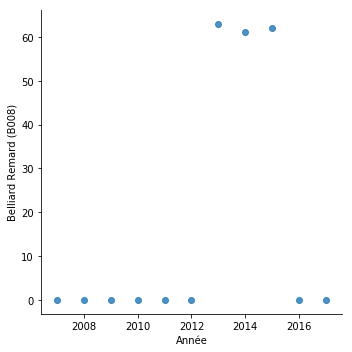

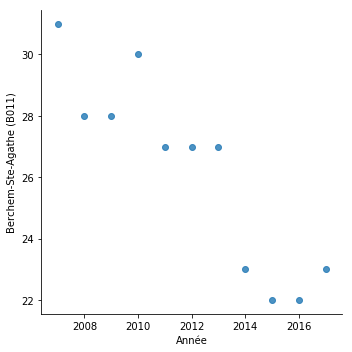

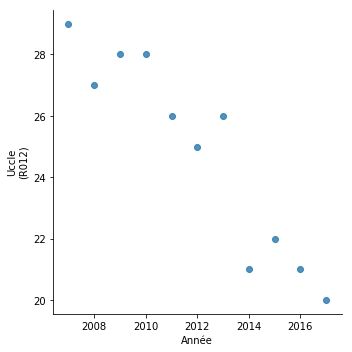

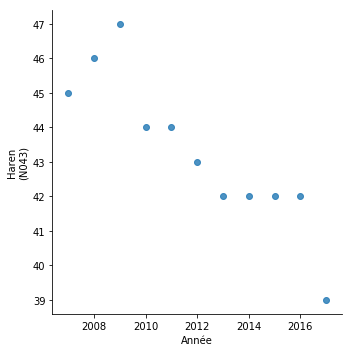

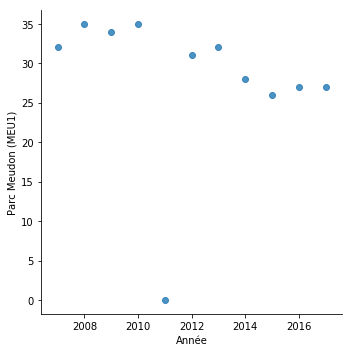

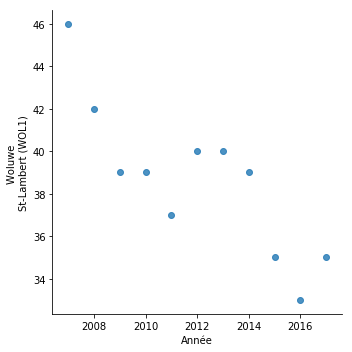

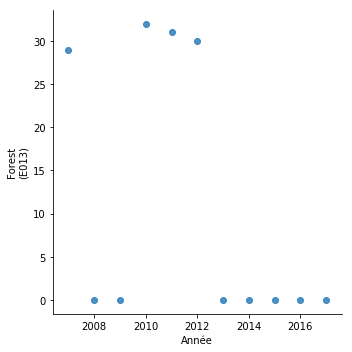

In [40]:
 list = ['Molenbeek (R001)', 'Ixelles\n(R002)',
       'Ste-Catherine (B004)', 'Eastman-Belliard (B005)',
       'Parlement européen (B006)', 'Belliard Remard (B008)',
       'Berchem-Ste-Agathe (B011)', 'Uccle\n(R012)', 'Haren\n(N043)',
       'Parc Meudon (MEU1)', 'Woluwe \nSt-Lambert (WOL1)', 'Forest\n(E013)']

for y in list: 
    sns.lmplot(data=decir, x="Année", y=y, fit_reg=False)

In [41]:
#Trial coding

no2 = df1.T
no2.columns= no2.iloc[0]
no2.columns.unique()
 no2.reset_index()

IndentationError: unexpected indent (<ipython-input-41-02a3c32d3397>, line 6)